In [ ]:
#importing the required metrics and performance metrics
#importing required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
import seaborn as sns

#importing warning to suppress where needed
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#accesing the datasets from file folder
m1=pd.read_csv('/content/drive/MyDrive/malignanat/train.csv')
cmnt=pd.DataFrame(m1)
m2=pd.read_csv('/content/drive/MyDrive/malignanat/test.csv')
test=pd.DataFrame(m2)

In [ ]:
#getting the insights
cmnt.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


If the comments are malignant then it must fullfill all the behaviour mentioned in the dataset.so its better to work on comments feature and malignant one.

In [ ]:
#checking for the datatypes
cmnt.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [ ]:
#null value check
cmnt.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is no null values in train data

In [ ]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [ ]:
#from the test data,we get the only valued format used to classify is comment_text,so take it for the furthur operations and dropping others
cmnt.drop(['id','highly_malignant','rude','threat','abuse','loathe'],axis=1,inplace=True)
cmnt

,comment_text,malignant
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [ ]:
cmnt.shape

(159571, 2)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Data Pre-Processing

In [ ]:
cmnt['comment_text'] = cmnt['comment_text'].str.lower()
test['comment_text'] = test['comment_text'].str.lower()
# Replace all other characters with space
cmnt['comment_text'] = cmnt['comment_text'].str.replace(r'[^a-zA-Z]',' ')
test['comment_text'] = test['comment_text'].str.replace(r'[^a-zA-Z]',' ')

In [ ]:
#removing punctuations and stopwords
import string
stop_words = set(stopwords.words('english'))

cmnt['comment_text']=cmnt['comment_text'].str.translate(str.maketrans('', '', string.punctuation))
cmnt['comment_text'] = cmnt['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

test['comment_text']=test['comment_text'].str.translate(str.maketrans('', '', string.punctuation))
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

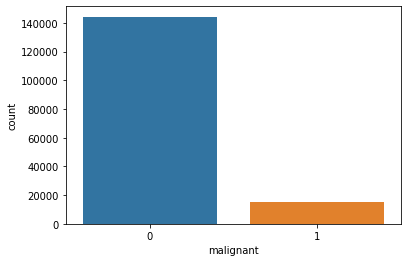

In [ ]:
sns.countplot(cmnt['malignant'])

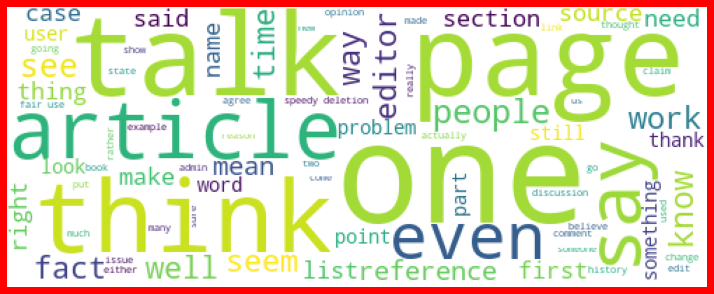

In [ ]:
#Getting sense of loud words in non-malignant 
from wordcloud import WordCloud

genuine = cmnt['comment_text'][cmnt['malignant']==0]

genuine_cloud = WordCloud(width=500,height=200,background_color='white',max_words=75).generate(' '.join(genuine))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(genuine_cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

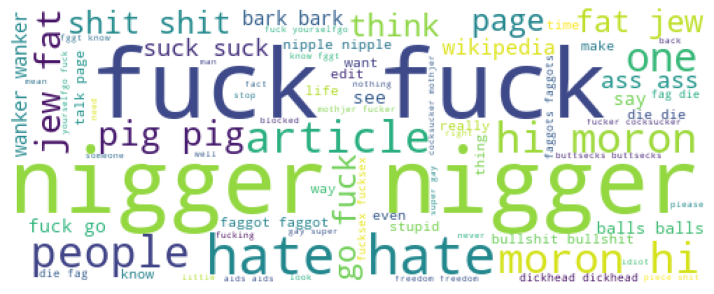

In [ ]:
#Getting sense of loud words in malignant 
from wordcloud import WordCloud

malignant = cmnt['comment_text'][cmnt['malignant']==1]

malignant_cloud = WordCloud(width=500,height=200,background_color='white',max_words=75).generate(' '.join(malignant))

plt.figure(figsize=(10,8))
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

In [ ]:
#importing required modelling techniques and metrics for evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve
tf_id=TfidfVectorizer()

In [ ]:
x=tf_id.fit_transform(cmnt['comment_text'])
y=cmnt['malignant']

In [ ]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print("Accuracy_score",accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [ ]:
#Function for roc curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(alg)
    plt.show()
    
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_score=',roc_score)

In [ ]:
#splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)

## Applied Algorithms

In [ ]:
#applying naive bayes
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
model(mnb)

score= 0.9232452858425622
Accuracy_score 0.9197098311779562
[[47588     4]
 [ 4224   843]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     47592
           1       1.00      0.17      0.29      5067

    accuracy                           0.92     52659
   macro avg       0.96      0.58      0.62     52659
weighted avg       0.93      0.92      0.89     52659



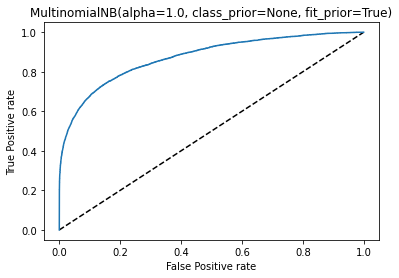

roc_score= 0.5831432928859186


In [ ]:
#roc curve and score of the data
roc(mnb)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model(dtc)

score= 0.9997755163124813
Accuracy_score 0.9422890673958867
[[46204  1388]
 [ 1651  3416]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     47592
           1       0.71      0.67      0.69      5067

    accuracy                           0.94     52659
   macro avg       0.84      0.82      0.83     52659
weighted avg       0.94      0.94      0.94     52659



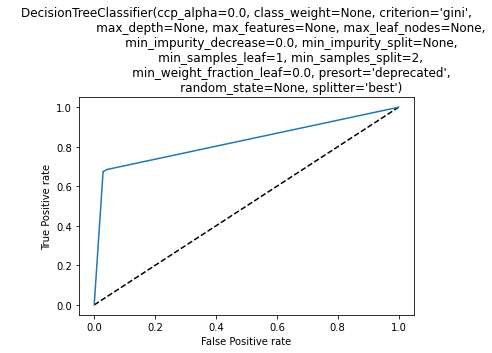

roc_score= 0.8225008039024424


In [ ]:
roc(dtc)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)
model(rf)

score= 0.9997755163124813
Accuracy_score 0.953797071725631
[[47360   232]
 [ 2201  2866]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.97     47592
           1       0.93      0.57      0.70      5067

    accuracy                           0.95     52659
   macro avg       0.94      0.78      0.84     52659
weighted avg       0.95      0.95      0.95     52659



### Conclusion
Random-forest and Decision tree are the best algorithm fro the above solved all three algorithms for this datasets